In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
s = pd.read_csv('sample_submission.csv')
vd = pd.read_csv('VariableDescription.csv')

In [3]:
pd.set_option('display.max_colwidth', 200) 
vd

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,"duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5"
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-Not Painted)"
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not Fenced)"
6,Garden,building has garden or not (V-has garden; O-no garden)
7,Settlement,Area where the building is located. (R- rural area; U- urban area)
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [4]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
# lets take a brief look at our data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [6]:
# Lets start with the first column, Year of obsrvation
train.YearOfObservation.value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [7]:
# Lets convert it to years
n_train = train
n_test = test

n_train['Last_checked'] = 2016 - n_train.YearOfObservation
n_test['Last_checked']=  2016 - n_test.YearOfObservation

In [8]:
n_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Last_checked
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0,3
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,1
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0,2
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0,3
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,2


In [9]:
# lets see how this correlates to the target
pd.crosstab(n_train['Last_checked'],n_train['Claim'], margins=True)

Claim,0,1,All
Last_checked,,,
0,828,215,1043
1,843,232,1075
2,1033,340,1373
3,1387,424,1811
4,1435,423,1858
All,5526,1634,7160


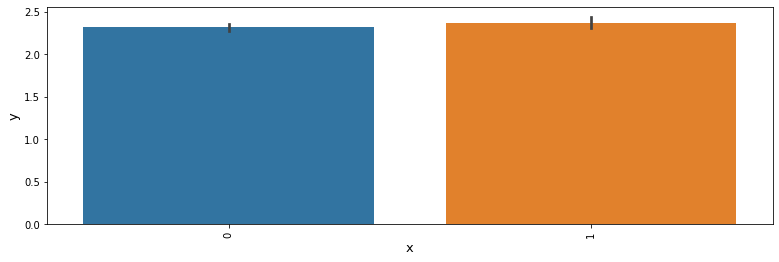

In [10]:
# plot of Last_checked versus Claim
import seaborn as sns
def plot_graph(x, y):
    fig, ax = plt.subplots(figsize = (13, 4))
    sns.barplot(x, y)
    plt.xlabel('x', fontSize=13)
    plt.xticks(rotation='90')
    plt.ylabel('y', fontSize=13)
    plt.show()
    
plot_graph(train.Claim, train.Last_checked)

In [11]:
n_train['Last_checked'][n_train['Last_checked'] == 4] =0
n_train['Last_checked'][n_train['Last_checked'] == 3] =1
n_train['Last_checked'][n_train['Last_checked'] == 2] =2
n_train['Last_checked'][n_train['Last_checked'] == 1] =3
n_train['Last_checked'][n_train['Last_checked'] == 0] =4

n_test['Last_checked'][n_test['Last_checked'] == 4] =0
n_test['Last_checked'][n_test['Last_checked'] == 3] =1
n_test['Last_checked'][n_test['Last_checked'] == 2] =2
n_test['Last_checked'][n_test['Last_checked'] == 1] =3
n_test['Last_checked'][n_test['Last_checked'] == 0] =4

In [12]:
# lets move to the Insured_Period column
train.Insured_Period.value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
0.832877      28
0.246575      27
0.997260      26
0.994536      24
0.915068      23
0.161644      23
0.084932      22
0.967213      22
0.665753      21
0.983562      17
0.580822      16
0.413699      16
0.328767      13
0.751366      12
0.748634      12
0.915301      12
0.836066      10
0.248634       9
0.579235       9
0.494536       9
0.084699       8
0.502732       8
0.251366       8
0.163934       7
0.989071       6
            ... 
0.789617       1
0.978082       1
0.860274       1
0.341530       1
0.450820       1
0.663014       1
0.597260       1
0.534247       1
0.202186       1
0.994521       1
0.106849       1
0.295082       1
0.454795       1
0.435616       1
0.972678       1
0.805479       1
0.032787       1
0.901639       1
0.646575       1
0.434426       1
0.420765       1
0.453552       1
0.688525       1
0.484932       1
0.887978       1
0.680328       1
0.819672       1
0.792350      

In [13]:
# lets see how this correlates to the target
pd.crosstab(train['Claim'],train['Insured_Period'], margins=True) 

Insured_Period,0.0,0.00273224,0.010928962,0.016393443,0.021917807999999997,0.024590163999999998,0.024657534,0.030054645,0.030136986,0.032786885,...,0.98630137,0.9890410959999999,0.989071038,0.9917808220000001,0.994520548,0.994535519,0.9972602740000001,0.99726776,1.0,All
Claim,,,,,,,,,,,,,,,,,,,,,
0,139,1,1,2,3,1,1,1,1,0,...,6,2,6,1,1,20,19,418,4024,5526
1,26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4,7,129,1301,1634
All,165,1,1,2,3,1,1,1,1,1,...,6,2,6,1,1,24,26,547,5325,7160


In [14]:
train.pivot_table(index=['Residential','Insured_Period'], columns='Settlement')

Building Dimension              Building_Type  \
Settlement                                  R            U             R   
Residential Insured_Period                                                 
0           0.000000              1508.750000  1362.056180      2.583333   
            0.002732              4760.000000          NaN      1.000000   
            0.010929               190.000000          NaN      2.000000   
            0.016393                      NaN   990.000000           NaN   
            0.021918               800.000000   150.000000      2.000000   
            0.024658                      NaN   400.000000           NaN   
            0.030055              2300.000000          NaN      2.000000   
            0.030137                      NaN          NaN           NaN   
            0.032787              3700.000000          NaN      1.000000   
            0.035616                      NaN          NaN           NaN   
            0.038251                      NaN   912.000000           NaN   
            0.038356               335.000000   400.000000      2.000000   
            0.043836               250.000000          NaN      2.000000   
            0.046448              4100.000000          NaN      1.000000   
            0.049180              2690.000000          NaN      1.000000   
            0.051913                      NaN  1450.000000           NaN   
            0.052055                      NaN  1220.000000           NaN   
            0.054795                      NaN   416.000000           NaN   
            0.057534               523.000000          NaN      1.000000   
            0.060109              1400.000000          NaN      1.000000   
            0.060274               700.000000          NaN      2.000000   
            0.065574              2397.000000          NaN      2.000000   
            0.071038              1300.000000          NaN      3.000000   
            0.073973                      NaN   120.000000           NaN   
            0.076712                      NaN  1090.000000           NaN   
            0.079452              2500.000000          NaN      2.000000   
            0.081967                      NaN  4337.000000           NaN   
            0.082192              2316.000000          NaN      1.000000   
            0.084699               383.000000   950.000000      1.000000   
            0.084932              1745.500000   984.000000      2.300000   
...                                       ...          ...           ...   
1           0.887978              1432.000000          NaN      4.000000   
            0.890411              1152.000000   400.000000      2.000000   
            0.893151              4255.000000          NaN      1.000000   
            0.901370              4709.000000   240.000000      3.000000   
            0.901639              6300.000000          NaN      2.000000   
            0.909589                      NaN   265.000000           NaN   
            0.909836               280.000000          NaN      2.000000   
            0.912568               600.000000          NaN      1.000000   
            0.915068              4242.800000   537.000000      2.200000   
            0.915301              4913.333333   812.000000      3.000000   
            0.917808                      NaN  1200.000000           NaN   
            0.920765              2081.500000   660.000000      3.250000   
            0.923288               990.000000          NaN      1.000000   
            0.928962              1430.000000          NaN      3.000000   
            0.942623              2183.000000          NaN      3.000000   
            0.950685               715.000000  1280.000000      3.000000   
            0.950820               903.000000          NaN      4.000000   
            0.953425                      NaN   990.000000           NaN   
            0.958904                      NaN  1300.000000           NaN   

In [15]:
n_train['Insured_Period'][n_train['Insured_Period'] < 0.5] = 1
n_train['Insured_Period'][n_train['Insured_Period'] > 0.49] = 0

n_test['Insured_Period'][n_test['Insured_Period'] < 0.5] = 1
n_test['Insured_Period'][n_test['Insured_Period'] > 0.49] = 0

In [16]:
# lets see how this correlates to the target
pd.crosstab(train['Claim'],train['Insured_Period'], margins=True) 

Insured_Period,0.0,All
Claim,,
0,5526,5526
1,1634,1634
All,7160,7160


In [17]:
# lets move to the residential column
pd.crosstab(train['Settlement'],train['Residential'], margins=True) 

Residential,0,1,All
Settlement,,,
R,2371,1239,3610
U,2602,948,3550
All,4973,2187,7160


In [18]:
pd.crosstab(train['Claim'],train['Residential'], margins=True) 

Residential,0,1,All
Claim,,,
0,3926,1600,5526
1,1047,587,1634
All,4973,2187,7160


In [19]:
# lest move to building painted column
pd.crosstab(train['Settlement'],train['Building_Painted'], margins=True) 

Building_Painted,N,V,All
Settlement,,,
R,7,3603,3610
U,1771,1779,3550
All,1778,5382,7160


In [20]:
pd.crosstab(train['Claim'],train['Building_Painted'], margins=True) 

Building_Painted,N,V,All
Claim,,,
0,1411,4115,5526
1,367,1267,1634
All,1778,5382,7160


In [21]:
pd.crosstab(train['Residential'],train['Building_Painted'], margins=True) 

Building_Painted,N,V,All
Residential,,,
0,1188,3785,4973
1,590,1597,2187
All,1778,5382,7160


In [22]:
# lets move to the Building_Fenced column
pd.crosstab(train['Claim'],train['Building_Fenced'], margins=True) 
    # all urban has fenced house

Building_Fenced,N,V,All
Claim,,,
0,2707,2819,5526
1,901,733,1634
All,3608,3552,7160


In [23]:
pd.crosstab(train['Settlement'],train['Building_Fenced'], margins=True) 

Building_Fenced,N,V,All
Settlement,,,
R,3608,2,3610
U,0,3550,3550
All,3608,3552,7160


In [24]:
# Lest move to Garden column
pd.crosstab(train['Garden'],train['Settlement'], margins=True)#.ix[30.0:116.0]

Settlement,R,U,All
Garden,,,
O,3602,0,3602
V,1,3550,3551
All,3603,3550,7153


In [25]:
pd.crosstab(train['Claim'],train['Garden'], margins=True)

Garden,O,V,All
Claim,,,
0,2702,2819,5521
1,900,732,1632
All,3602,3551,7153


In [26]:
pd.crosstab(train['Garden'],train['Residential'], margins=True)#.ix[30.0:116.0]

Residential,0,1,All
Garden,,,
O,2365,1237,3602
V,2602,949,3551
All,4967,2186,7153


In [27]:
pd.crosstab(train['Garden'],train['Building_Type'], margins=True)#.ix[30.0:116.0]

Building_Type,1,2,3,4,All
Garden,,,,,
O,847,1637,644,474,3602
V,863,1668,585,435,3551
All,1710,3305,1229,909,7153


In [28]:
# now to the Building_Type column
pd.crosstab(train['Claim'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Claim,,,,,
0,1412,2593,919,602,5526
1,304,712,311,307,1634
All,1716,3305,1230,909,7160


In [29]:
pd.crosstab(train['Settlement'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Settlement,,,,,
R,853,1638,645,474,3610
U,863,1667,585,435,3550
All,1716,3305,1230,909,7160


In [30]:
pd.crosstab(train['Residential'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Residential,,,,,
0,1433,2590,578,372,4973
1,283,715,652,537,2187
All,1716,3305,1230,909,7160


In [31]:
pd.crosstab(train['Building_Fenced'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Building_Fenced,,,,,
N,853,1636,645,474,3608
V,863,1669,585,435,3552
All,1716,3305,1230,909,7160


In [32]:
pd.crosstab(train['Building_Painted'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Building_Painted,,,,,
N,370,825,324,259,1778
V,1346,2480,906,650,5382
All,1716,3305,1230,909,7160


In [33]:
# NumberOfWindows column
pd.crosstab(train['NumberOfWindows'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
NumberOfWindows,,,,,
.,863,1668,585,435,3551
1,19,39,13,4,75
2,90,210,46,17,363
3,246,439,108,51,844
4,260,435,152,92,939
5,140,267,152,80,639
6,48,112,64,82,306
7,23,50,53,85,211
8,11,32,29,44,116


In [34]:
pd.crosstab(train['NumberOfWindows'],train['Claim'], margins=True) 

Claim,0,1,All
NumberOfWindows,,,
.,2819,732,3551
1,68,7,75
2,323,40,363
3,713,131,844
4,717,222,939
5,447,192,639
6,201,105,306
7,121,90,211
8,61,55,116


In [35]:
pd.pivot_table(train,index=['NumberOfWindows','Building_Type'], columns='Claim')

Building Dimension                \
Claim                                          0             1   
NumberOfWindows Building_Type                                    
   .            1                    1423.924747   3080.258741   
                2                    1321.399228   2694.702532   
                3                    1072.829596   2219.300813   
                4                    1216.306667   2466.480916   
1               1                     958.684211           NaN   
                2                    1234.500000   3520.600000   
                3                     819.615385           NaN   
                4                     960.000000   3350.000000   
2               1                    1036.887500   2215.600000   
                2                     993.113514   1637.600000   
                3                     861.595238   1383.500000   
                4                     924.687500    280.000000   
3               1                    1138.943396   2119.176471   
                2                    1240.656836   2032.303030   
                3                    1327.755556   2627.055556   
                4                     742.526316   1186.076923   
4               1                    1657.448780   2630.381818   
                2                    1619.520000   2873.263636   
                3                    1418.728070   2092.263158   
                4                    1198.972603   2283.421053   
5               1                    2596.571429   3639.678571   
                2                    1933.594595   3758.939024   
                3                    2207.383838   3380.188679   
                4                    1821.078431   3120.275862   
6               1                    3747.257143   5742.000000   
                2                    2901.485714   4974.380952   
                3                    2043.244444   3043.684211   
                4                    1923.784314   3915.322581   
7               1                    4318.235294   7053.333333   
                2                    3605.794118   5943.812500   
                3                    2379.064516   3231.636364   
                4                    2372.769231   3468.478261   
8               1                    4353.600000   4655.000000   
                2                    3783.428571   4920.090909   
                3                    4881.888889   6084.545455   
                4                    3138.941176   4366.814815   
9               1                    2976.000000   1900.000000   
                2                    2871.333333   8188.545455   
                3                    3928.000000   5396.428571   
                4                    3288.125000   3345.833333   
>=10            1                    5772.000000   5006.000000   
                2                    5559.375000   8024.764706   
                3                    3529.250000  10396.090909   
                4                    6945.000000   5530.000000   

                              Date_of_Occupancy              Insured_Period  \
Claim                                         0            1              0   
NumberOfWindows Building_Type                                                 
   .            1                   1974.118196  1976.834586            0.0   
                2                   1970.402730  1972.743945            0.0   
                3                   1967.449315  1968.669811            0.0   
                4                   1969.600858  1968.901961            0.0   
1               1                   1967.157895          NaN            0.0   
                2                   1978.147059  1992.600000            0.0   
                3                   1959.461538          NaN            0.0   
                4                   1968.500000  1957.500000            0.0   
2               1                   1980.175000  1991.3000

In [36]:
pd.crosstab(train['NumberOfWindows'],train['Settlement'], margins=True) 

Settlement,R,U,All
NumberOfWindows,,,
.,1,3550,3551
1,75,0,75
2,363,0,363
3,844,0,844
4,939,0,939
5,639,0,639
6,306,0,306
7,211,0,211
8,116,0,116


In [37]:
for i in train.NumberOfWindows:
        n_train.NumberOfWindows = train.NumberOfWindows.replace('   .', 0)
        n_train.NumberOfWindows = train.NumberOfWindows.replace('>=10', 10)
        
for i in test.NumberOfWindows:
        n_test.NumberOfWindows = test.NumberOfWindows.replace('   .', 0)
        n_test.NumberOfWindows = test.NumberOfWindows.replace('>=10', 10)

In [38]:
# Lets move to the Settlement column
pd.crosstab(train['Claim'],train['Settlement'], margins=True) 

Settlement,R,U,All
Claim,,,
0,2708,2818,5526
1,902,732,1634
All,3610,3550,7160


In [39]:
pd.crosstab(train['Settlement'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Settlement,,,,,
R,853,1638,645,474,3610
U,863,1667,585,435,3550
All,1716,3305,1230,909,7160


In [40]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'Last_checked'],
      dtype='object')

In [41]:
# lets move to the Date_of_Occupancy column
n_train['Age_of_Building'] = 2016- n_train['Date_of_Occupancy']

n_test['Age_of_Building'] = 2016- n_test['Date_of_Occupancy']

In [42]:
pd.crosstab(n_train['Age_of_Building'],train['Building_Type'], margins=True) 

Building_Type,1,2,3,4,All
Age_of_Building,,,,,
0.0,1,1,0,0,2
1.0,6,1,1,0,8
2.0,3,4,2,0,9
3.0,7,8,1,1,17
4.0,25,26,9,2,62
5.0,36,50,8,3,97
6.0,31,26,7,1,65
7.0,36,31,18,4,89
8.0,16,52,4,2,74


In [43]:
pd.crosstab(n_train['Age_of_Building'],train['Claim'], margins=True) 

Claim,0,1,All
Age_of_Building,,,
0.0,2,0,2
1.0,8,0,8
2.0,7,2,9
3.0,15,2,17
4.0,52,10,62
5.0,78,19,97
6.0,45,20,65
7.0,70,19,89
8.0,58,16,74


In [44]:
n_train['Age_of_Building'][n_train['Age_of_Building'] < 117] = 0
n_train['Age_of_Building'][n_train['Age_of_Building'] > 116] = 1

n_test['Age_of_Building'][n_test['Age_of_Building'] < 117] = 0
n_test['Age_of_Building'][n_test['Age_of_Building'] > 116] = 1

In [45]:
pd.crosstab(n_train['Age_of_Building'],train['Claim'], margins=True) 

Claim,0,1,All
Age_of_Building,,,
0.0,4985,1492,6477
1.0,135,40,175
All,5120,1532,6652


In [46]:
# Building Dimension
n_train['length_of_building'] = 10 * (np.sqrt(train['Building Dimension']))
a = np.mean(train.length_of_building)
n_train.length_of_building.fillna(a, inplace=True)
n_train['length_of_building'] = n_train['length_of_building'].round(1)

# Building Dimension
n_test['length_of_building'] = 10 * (np.sqrt(test['Building Dimension']))
a = np.mean(test.length_of_building)
n_test.length_of_building.fillna(a, inplace=True)
n_test['length_of_building'] = n_test['length_of_building'].round(1)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 17 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
Last_checked          7160 non-null int64
Age_of_Building       6652 non-null float64
length_of_building    7160 non-null float64
dtypes: float64(5), int64(5), object(7)
memory usage: 951.0+ KB


In [48]:
n_train.drop(['Customer Id', 'YearOfObservation', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code', 'Claim'], axis=1, inplace=True)
n_test.drop(['Customer Id', 'YearOfObservation', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code'], axis=1, inplace=True)

In [49]:
n_train.Age_of_Building.fillna(n_train.Age_of_Building.mean, inplace=True)

n_train['Garden'][n_train['Garden'] == 'V'] = 1
n_train['Garden'][n_train['Garden'] == 'O'] = 0

n_train['Building_Painted'][n_train['Building_Painted'] == 'V'] = 0
n_train['Building_Painted'][n_train['Building_Painted'] == 'N'] = 1

n_train['Building_Fenced'][n_train['Building_Fenced'] == 'V'] = 1
n_train['Building_Fenced'][n_train['Building_Fenced'] == 'N'] = 0

n_train['length_of_building'] = n_train['length_of_building'].fillna(n_train['length_of_building'].mean)

n_train['Settlement'][n_train['Settlement'] == 'U'] = 1
n_train['Settlement'][n_train['Settlement'] == 'R'] = 0

n_train.Garden.fillna(2, inplace=True)


n_test.Age_of_Building.fillna(n_test.Age_of_Building.mean, inplace=True)

n_test['Garden'][n_train['Garden'] == 'V'] = 1
n_test['Garden'][n_train['Garden'] == 'O'] = 0

n_test['Building_Painted'][n_test['Building_Painted'] == 'V'] = 0
n_test['Building_Painted'][n_test['Building_Painted'] == 'N'] = 1

n_test['Building_Fenced'][n_test['Building_Fenced'] == 'V'] = 1
n_test['Building_Fenced'][n_test['Building_Fenced'] == 'N'] = 0

n_test['length_of_building'] = n_test['length_of_building'].fillna(n_test['length_of_building'].median())

n_test['Settlement'][n_test['Settlement'] == 'U'] = 1
n_test['Settlement'][n_test['Settlement'] == 'R'] = 0

n_test.Garden.fillna(2, inplace=True)
# the 2 means not sure

In [50]:
n_train.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,NumberOfWindows,Last_checked,Age_of_Building,length_of_building
0,0.0,0,1,1,1,1,1,0,3,0,170.3
1,0.0,0,0,0,0,0,1,4,3,1,221.4
2,0.0,0,1,1,1,1,1,0,2,0,243.9
3,0.0,0,0,1,1,1,1,0,3,0,532.9
4,0.0,0,0,0,0,0,1,3,2,1,260.8


In [52]:
for i in n_train.columns:
    n_train[i] = pd.to_numeric(i)
    
for i in n_test.columns:
    n_test[i] = pd.to_numeric(i)

ValueError: Unable to parse string "Insured_Period" at position 0

In [53]:
import flask

In [ ]:
from flask import Flask